# PML Test (Hugonin 2005)

This test illustrates the usage of the complex coordinate transform. This is useful when dealing with structure in which a high portion of the power is scattered away. 

This test is based on the paper "Perfectly matched layers as nonlinear coordinate
transforms: a generalized formalization" by Jean Paul Hugonin and Philippe Lalanne (J. Opt. Soc. Am. A / Vol. 22, No. 9 / September 2005).

## Summary
The example will compute the reflection and transmission from 2 dent in a 1D waveguide. 

The following example will:
 1. Import all necessary modules
 2. Define the layers involved
 3. Combine them into a structure
 4. Calculate transmission and reflection
 5. Sweep over truncation order
 
 
### Import modules

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import A_FMM

### Define layers involved

In [16]:
ax = 1.0
lam = 0.975
k0 = ax/lam

s = 0.3
d = 0.15

n_core = 3.5
n_clad = 2.9
n_air = 1.0

Nx = 20
Ny = 0

cr = A_FMM.Creator()
cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
wave = A_FMM.Layer(Nx,0,cr)
cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
gap=A_FMM.Layer(Nx,0,cr)   

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


(Text(0.5, 0, 'z'),
 Text(0, 0.5, 'x'),
 <matplotlib.colorbar.Colorbar at 0x7f0a43edcf70>)

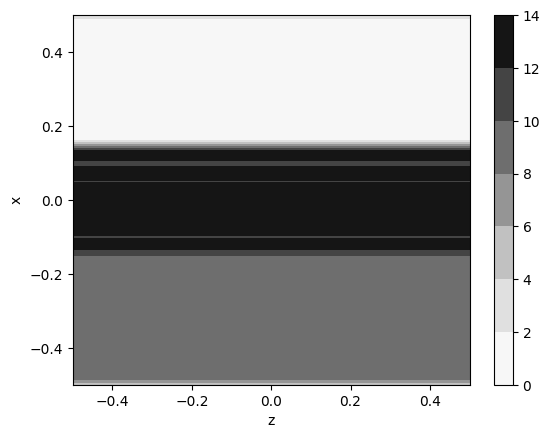

In [17]:
eps = wave.calculate_epsilon(x=np.linspace(-0.5, 0.5, 101), z=np.linspace(-0.5, 0.5, 101))
plt.contourf(np.squeeze(eps['z']), np.squeeze(eps['x']), np.squeeze(eps['eps']), cmap='Greys')
plt.xlabel('z'), plt.ylabel('x'), plt.colorbar()

(Text(0.5, 0, 'z'),
 Text(0, 0.5, 'x'),
 <matplotlib.colorbar.Colorbar at 0x7f0a43d61810>)

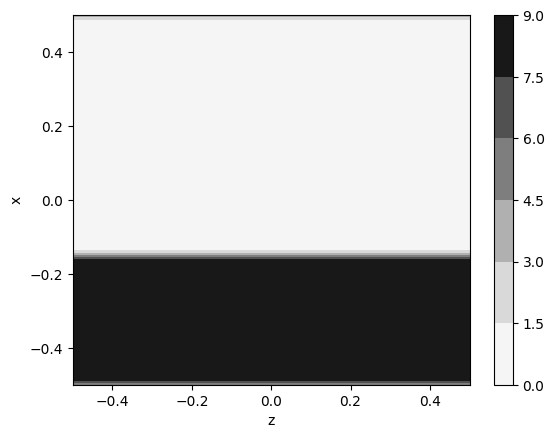

In [18]:
eps = gap.calculate_epsilon(x=np.linspace(-0.5, 0.5, 101), z=np.linspace(-0.5, 0.5, 101))
plt.contourf(np.squeeze(eps['z']), np.squeeze(eps['x']), np.squeeze(eps['eps']), cmap='Greys')
plt.xlabel('z'), plt.ylabel('x'), plt.colorbar()

### Define stack structure

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None, Text(0.5, 1.0, 'Epsilon'))

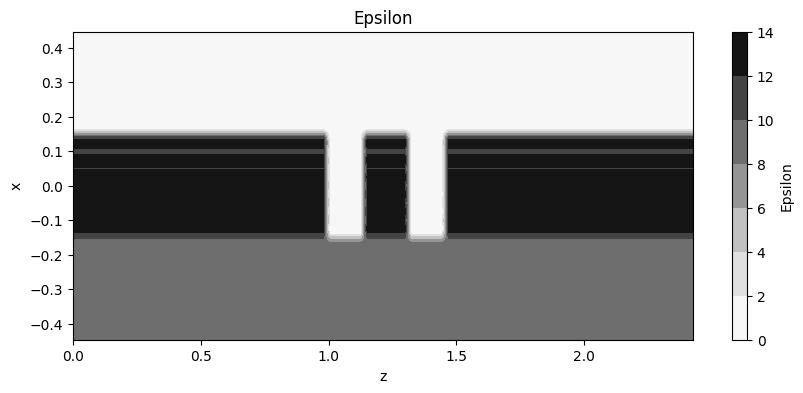

In [19]:
mat = [wave, gap, wave, gap, wave]
dl = [x/ax for x in [1.0,d,d,d,1.0]]
st = A_FMM.Stack(mat, dl)
st.count_interface()
st.transform(0.7, complex_transform=True)

fig, axp = plt.subplots(1,1, figsize=(10,4))
eps = st.calculate_epsilon(x=np.linspace(-0.5, 0.5, 101), z=np.linspace(0.0, st.total_length, 101))
_ = axp.contourf(np.squeeze(eps['z']), np.squeeze(eps['x']), np.squeeze(eps['eps']), cmap='Greys')
axp.set_xlabel('z'), axp.set_ylabel('x'),  fig.colorbar(_, ax=axp).set_label('Epsilon'), axp.set_title('Epsilon')

### Solve structure and calculate reflection


In [20]:
st.solve(ax/lam)
print('TE Reflection:{}'.format(st.get_R(0,0)))
print('TM Reflection:{}'.format(st.get_R(1,1)))

TE Reflection:0.39309072129969463
TM Reflection:0.355182421932307


## Field Plotting
### Plotting field under TE illumination

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None, Text(0.5, 1.0, 'Field'))

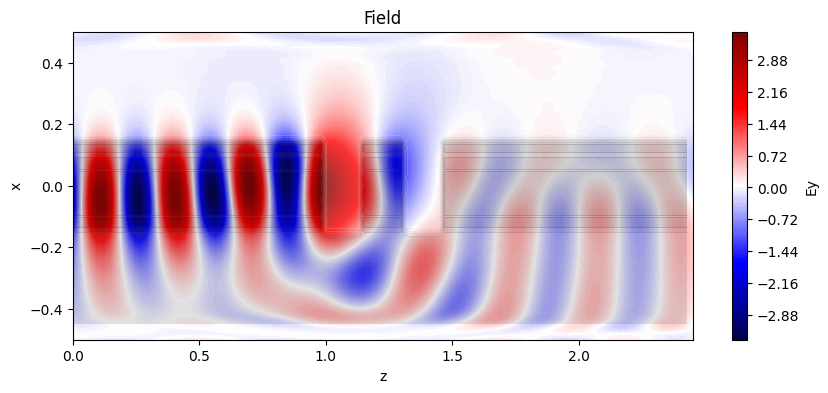

In [21]:
u = wave.create_input({0 : 1.0})
field = st.calculate_fields(u1=u, x=np.linspace(-0.5, 0.5, 101), z=np.linspace(0.0, st.total_length, 101))
fig, axp = plt.subplots(1,1, figsize=(10,4))
_ = axp.contourf(np.squeeze(field['z']), np.squeeze(field['x']), np.squeeze(field['Ey']), cmap='seismic', levels=201)
axp.contourf(np.squeeze(eps['z']), np.squeeze(eps['x']), np.squeeze(eps['eps']), cmap='Greys', alpha=0.2)
axp.set_xlabel('z'), axp.set_ylabel('x'),  fig.colorbar(_, ax=axp).set_label('Ey'), axp.set_title('Field')

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None, Text(0.5, 1.0, 'Field'))

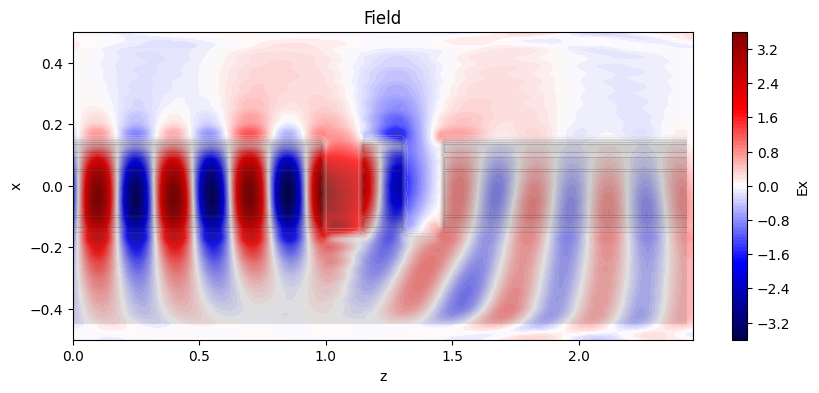

In [22]:
u = wave.create_input({1 : 1.0})
field = st.calculate_fields(u1=u, x=np.linspace(-0.5, 0.5, 101), z=np.linspace(0.0, st.total_length, 201))
fig, axp = plt.subplots(1,1, figsize=(10,4))
_ = axp.contourf(np.squeeze(field['z']), np.squeeze(field['x']), np.squeeze(field['Ex']), cmap='seismic', levels=101)
axp.contourf(np.squeeze(eps['z']), np.squeeze(eps['x']), np.squeeze(eps['eps']), cmap='Greys', alpha=0.2)
axp.set_xlabel('z'), axp.set_ylabel('x'),  fig.colorbar(_, ax=axp).set_label('Ex'), axp.set_title('Field')

## Sweep over truncation order

In [23]:
def calc(Nx):
    cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
    wave = A_FMM.Layer(Nx,0,cr)
    cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
    gap=A_FMM.Layer(Nx,0,cr)   
    mat = [wave, gap, wave, gap, wave]
    dl = [x/ax for x in [1.0,d,d,d,1.0]]
    st = A_FMM.Stack(mat, dl)
    st.count_interface()
    st.transform(0.7, complex_transform=True)
    st.solve(ax/lam)
    return st.get_R(0,0), st.get_R(1,1)

In [24]:
NX = [10,20,30,40,50,60,70,80,100]
RR = [calc(Nx) for Nx in NX]
Data = pd.DataFrame(RR, index=NX, columns=['TE', 'TM'])

(None,
 Text(0.5, 0, 'Truncation Order'),
 Text(0, 0.5, '$\\frac{|R-R_0|}{R_0}$'),
 None)

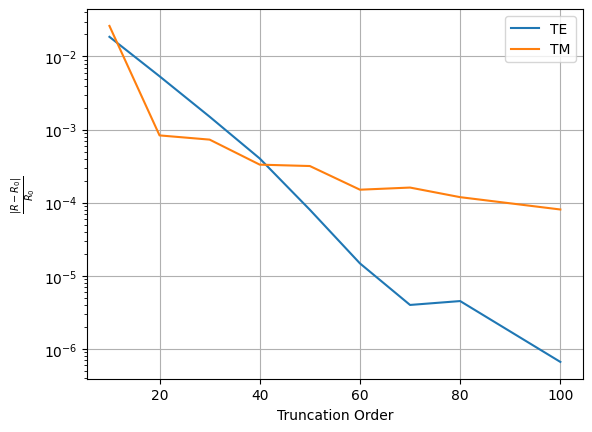

In [25]:
plt.plot(NX, abs(Data['TE']-0.3952113445) /0.3952113445 , label='TE')
plt.plot(NX, abs(Data['TM']-0.3554787) /0.3554787 , label='TM')
plt.yscale('log'), plt.xlabel('Truncation Order'), plt.ylabel(r'$\frac{|R-R_0|}{R_0}$'), plt.legend(), plt.grid()